In [281]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import tree
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot


# %matplotlib notebook
%matplotlib inline

# Disabling false positive warnings
pd.options.mode.chained_assignment = None  # default='warn'

In [136]:
# opening earthquake data
eq_df = pd.read_csv('../oklahoma_earthquakes_largefiles/usgs_cleaned/usgs_eqs_reduced_data.csv', low_memory=False)
# converting date fields to date-time dtype
eq_df.iloc[:, 10] = eq_df.iloc[:, 10].apply(pd.to_datetime)

In [192]:
eq_df

,id,time,mag,magType,cdi,place,status,latitude,longitude,depth,date
0,us2000iz6u,1546166814510,2.2,mb_lg,NaN,"6 km ESE of Cleo Springs, Oklahoma",reviewed,36.3818,-98.3804,6.01,2018-12-30 10:46:54.510
1,us2000iz51,1546159833730,2.0,mb_lg,NaN,"5 km ESE of Cleo Springs, Oklahoma",reviewed,36.3917,-98.3808,6.28,2018-12-30 08:50:33.730
2,us2000iz4w,1546158498840,2.2,ml,NaN,"13 km NNW of Pawnee, Oklahoma",reviewed,36.4443,-96.8762,5.36,2018-12-30 08:28:18.840
3,us2000iyvs,1546073324730,2.5,mb_lg,3.3,"5 km WSW of Arcadia, Oklahoma",reviewed,35.6547,-97.3898,5.00,2018-12-29 08:48:44.730
4,us2000iyvq,1546073222930,2.2,mb_lg,NaN,"6 km W of Arcadia, Oklahoma",reviewed,35.6747,-97.3990,7.42,2018-12-29 08:47:02.930
...,...,...,...,...,...,...,...,...,...,...,...
20619,usp000gucq,1235535255330,3.3,mblg,3.8,"4 km SE of Ashland, Oklahoma",reviewed,34.7350,-96.0360,5.00,2009-02-25 04:14:15.330
20620,usp000gu9h,1235295786750,3.2,mblg,3.8,"2 km S of Lahoma, Oklahoma",reviewed,36.3690,-98.0870,5.00,2009-02-22 09:43:06.750
20621,usp000gtdu,1233656590010,3.1,mblg,2.2,"2 km SSE of Centrahoma, Oklahoma",reviewed,34.5890,-96.3400,5.00,2009-02-03 10:23:10.010
20622,usp000gt8m,1233277072380,2.4,mblg,2.9,"4 km NW of Chandler, Oklahoma",reviewed,35.7240,-96.9200,5.00,2009-01-30 00:57:52.380


<AxesSubplot:>

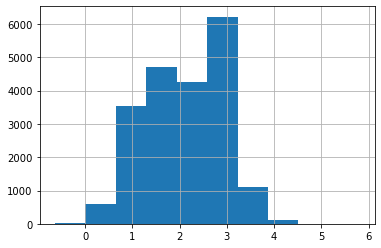

In [137]:
# Distribution of earthquake magnitudes
eq_df.mag.hist()

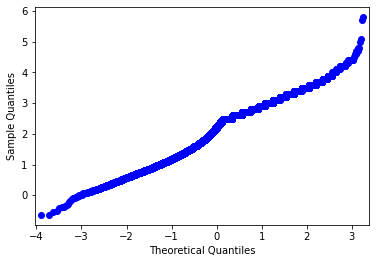

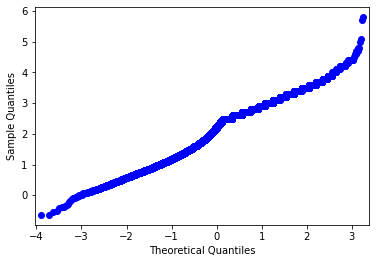

In [177]:
# Q-Q Plot of earthquake magnitudes
qqplot(eq_df.mag, line="s")

In [175]:
fig = px.histogram(eq_df, x="mag", nbins=10)
fig.show()

In [196]:
# Filtering for earthquakes for M>=3
mag_3 = eq_df[eq_df["mag"] >= 3]

In [197]:
# subtracting 7 days to test offset/delayed effect 
# time_change = datetime.timedelta(days=7)
mag_3["date_minus_7"] = mag_3["date"] - pd.Timedelta(days=7)
mag_3["date_minus_14"] = mag_3["date"] - pd.Timedelta(days=14)
mag_3["date_minus_21"] = mag_3["date"] - pd.Timedelta(days=21)
mag_3["date_minus_28"] = mag_3["date"] - pd.Timedelta(days=28)
mag_3["date_minus_35"] = mag_3["date"] - pd.Timedelta(days=35)
mag_3["date_minus_42"] = mag_3["date"] - pd.Timedelta(days=42)
mag_3["date_minus_49"] = mag_3["date"] - pd.Timedelta(days=49)
mag_3["date_minus_56"] = mag_3["date"] - pd.Timedelta(days=56)
mag_3["date_minus_63"] = mag_3["date"] - pd.Timedelta(days=63)
mag_3["date_minus_70"] = mag_3["date"] - pd.Timedelta(days=70)

In [198]:
# monthly count of earthquakes where M>=3
monthly_count_eq = mag_3.groupby(pd.Grouper(key="date",freq='M'))["mag"].count()
monthly_count_eq_df = pd.DataFrame(monthly_count_eq)
monthly_count_eq_df.rename(columns = {"mag":"count_m3"}, inplace=True)
monthly_count_eq_df.head()

,count_m3
date,
2009-01-31,1
2009-02-28,3
2009-03-31,1
2009-04-30,0
2009-05-31,0


In [199]:
# monthly count of earthquakes where M>=3, day-7
monthly_count_eq_minus_7 = mag_3.groupby(pd.Grouper(key="date_minus_7",freq='M'))["mag"].count()
monthly_count_eq_minus_7_df = pd.DataFrame(monthly_count_eq_minus_7)
monthly_count_eq_minus_7_df.reset_index(inplace=True)
monthly_count_eq_minus_7_df.rename(columns={"date_minus_7":"date"}, inplace = True)
monthly_count_eq_minus_7_df.set_index("date", inplace=True)
monthly_count_eq_minus_7_df.rename(columns = {"mag":"count_m3_offset7"}, inplace=True)
monthly_count_eq_df = monthly_count_eq_df.join(monthly_count_eq_minus_7_df)

In [200]:
# monthly count of earthquakes where M>=3, day-14
monthly_count_eq_minus_14 = mag_3.groupby(pd.Grouper(key="date_minus_14",freq='M'))["mag"].count()
monthly_count_eq_minus_14_df = pd.DataFrame(monthly_count_eq_minus_14)
monthly_count_eq_minus_14_df.reset_index(inplace=True)
monthly_count_eq_minus_14_df.rename(columns={"date_minus_14":"date"}, inplace = True)
monthly_count_eq_minus_14_df.set_index("date", inplace=True)
monthly_count_eq_minus_14_df.rename(columns = {"mag":"count_m3_offset14"}, inplace=True)
monthly_count_eq_df = monthly_count_eq_df.join(monthly_count_eq_minus_14_df)

In [201]:
# monthly count of earthquakes where M>=3, day-21
monthly_count_eq_minus_21 = mag_3.groupby(pd.Grouper(key="date_minus_21",freq='M'))["mag"].count()
monthly_count_eq_minus_21_df = pd.DataFrame(monthly_count_eq_minus_21)
monthly_count_eq_minus_21_df.reset_index(inplace=True)
monthly_count_eq_minus_21_df.rename(columns={"date_minus_21":"date"}, inplace = True)
monthly_count_eq_minus_21_df.set_index("date", inplace=True)
monthly_count_eq_minus_21_df.rename(columns = {"mag":"count_m3_offset21"}, inplace=True)
monthly_count_eq_df = monthly_count_eq_df.join(monthly_count_eq_minus_21_df)

In [202]:
# monthly count of earthquakes where M>=3, day-28
monthly_count_eq_minus_28 = mag_3.groupby(pd.Grouper(key="date_minus_28",freq='M'))["mag"].count()
monthly_count_eq_minus_28_df = pd.DataFrame(monthly_count_eq_minus_28)
monthly_count_eq_minus_28_df.reset_index(inplace=True)
monthly_count_eq_minus_28_df.rename(columns={"date_minus_28":"date"}, inplace = True)
monthly_count_eq_minus_28_df.set_index("date", inplace=True)
monthly_count_eq_minus_28_df.rename(columns = {"mag":"count_m3_offset28"}, inplace=True)
monthly_count_eq_df = monthly_count_eq_df.join(monthly_count_eq_minus_28_df)

In [203]:
# monthly count of earthquakes where M>=3, day-35
monthly_count_eq_minus_35 = mag_3.groupby(pd.Grouper(key="date_minus_35",freq='M'))["mag"].count()
monthly_count_eq_minus_35_df = pd.DataFrame(monthly_count_eq_minus_35)
monthly_count_eq_minus_35_df.reset_index(inplace=True)
monthly_count_eq_minus_35_df.rename(columns={"date_minus_35":"date"}, inplace = True)
monthly_count_eq_minus_35_df.set_index("date", inplace=True)
monthly_count_eq_minus_35_df.rename(columns = {"mag":"count_m3_offset35"}, inplace=True)
monthly_count_eq_df = monthly_count_eq_df.join(monthly_count_eq_minus_35_df)

In [204]:
# monthly count of earthquakes where M>=3, day-42
monthly_count_eq_minus_42 = mag_3.groupby(pd.Grouper(key="date_minus_42",freq='M'))["mag"].count()
monthly_count_eq_minus_42_df = pd.DataFrame(monthly_count_eq_minus_42)
monthly_count_eq_minus_42_df.reset_index(inplace=True)
monthly_count_eq_minus_42_df.rename(columns={"date_minus_42":"date"}, inplace = True)
monthly_count_eq_minus_42_df.set_index("date", inplace=True)
monthly_count_eq_minus_42_df.rename(columns = {"mag":"count_m3_offset42"}, inplace=True)
monthly_count_eq_df = monthly_count_eq_df.join(monthly_count_eq_minus_42_df)

In [205]:
# monthly count of earthquakes where M>=3, day-49
monthly_count_eq_minus_49 = mag_3.groupby(pd.Grouper(key="date_minus_49",freq='M'))["mag"].count()
monthly_count_eq_minus_49_df = pd.DataFrame(monthly_count_eq_minus_49)
monthly_count_eq_minus_49_df.reset_index(inplace=True)
monthly_count_eq_minus_49_df.rename(columns={"date_minus_49":"date"}, inplace = True)
monthly_count_eq_minus_49_df.set_index("date", inplace=True)
monthly_count_eq_minus_49_df.rename(columns = {"mag":"count_m3_offset49"}, inplace=True)
monthly_count_eq_df = monthly_count_eq_df.join(monthly_count_eq_minus_49_df)

In [206]:
# monthly count of earthquakes where M>=3, day-56
monthly_count_eq_minus_56 = mag_3.groupby(pd.Grouper(key="date_minus_56",freq='M'))["mag"].count()
monthly_count_eq_minus_56_df = pd.DataFrame(monthly_count_eq_minus_56)
monthly_count_eq_minus_56_df.reset_index(inplace=True)
monthly_count_eq_minus_56_df.rename(columns={"date_minus_56":"date"}, inplace = True)
monthly_count_eq_minus_56_df.set_index("date", inplace=True)
monthly_count_eq_minus_56_df.rename(columns = {"mag":"count_m3_offset56"}, inplace=True)
monthly_count_eq_df = monthly_count_eq_df.join(monthly_count_eq_minus_56_df)

In [207]:
# monthly count of earthquakes where M>=3, day-63
monthly_count_eq_minus_63 = mag_3.groupby(pd.Grouper(key="date_minus_63",freq='M'))["mag"].count()
monthly_count_eq_minus_63_df = pd.DataFrame(monthly_count_eq_minus_63)
monthly_count_eq_minus_63_df.reset_index(inplace=True)
monthly_count_eq_minus_63_df.rename(columns={"date_minus_63":"date"}, inplace = True)
monthly_count_eq_minus_63_df.set_index("date", inplace=True)
monthly_count_eq_minus_63_df.rename(columns = {"mag":"count_m3_offset63"}, inplace=True)
monthly_count_eq_df = monthly_count_eq_df.join(monthly_count_eq_minus_63_df)

In [208]:
# monthly count of earthquakes where M>=3, day-70
monthly_count_eq_minus_70 = mag_3.groupby(pd.Grouper(key="date_minus_70",freq='M'))["mag"].count()
monthly_count_eq_minus_70_df = pd.DataFrame(monthly_count_eq_minus_70)
monthly_count_eq_minus_70_df.reset_index(inplace=True)
monthly_count_eq_minus_70_df.rename(columns={"date_minus_70":"date"}, inplace = True)
monthly_count_eq_minus_70_df.set_index("date", inplace=True)
monthly_count_eq_minus_70_df.rename(columns = {"mag":"count_m3_offset70"}, inplace=True)
monthly_count_eq_df = monthly_count_eq_df.join(monthly_count_eq_minus_70_df)

<AxesSubplot:>

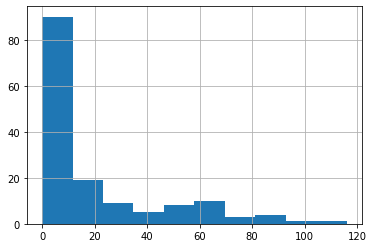

In [209]:
monthly_count_eq_df.count_m3.hist()

In [78]:
# Import monthly injection volumes
injection_df = pd.read_csv("../oklahoma_earthquakes_largefiles/for_analysis/round_down_reduced.csv", low_memory=False)

In [79]:
injection_df.head()

,date,year,monthly_volume,well_count
0,2014-01-31,2014,38454162.0,527
1,2014-02-28,2014,33884523.0,527
2,2014-03-31,2014,40540718.0,527
3,2014-04-30,2014,40993509.0,527
4,2014-05-31,2014,41752256.0,527


In [80]:
# add column for m3
injection_df["monthly_volume_m3"] = injection_df.monthly_volume * 0.16

In [81]:
injection_df.sort_values(by='date')

,date,year,monthly_volume,well_count,monthly_volume_m3
96,2011-01-31,2011,10643949.0,205,1703031.84
97,2011-02-28,2011,9144807.0,205,1463169.12
98,2011-03-31,2011,11135572.0,205,1781691.52
99,2011-04-30,2011,11033870.0,205,1765419.20
100,2011-05-31,2011,12309264.0,205,1969482.24
...,...,...,...,...,...
91,2021-08-31,2021,0.0,675,0.00
92,2021-09-30,2021,0.0,675,0.00
93,2021-10-31,2021,0.0,675,0.00
94,2021-11-30,2021,0.0,675,0.00


In [82]:
# convery monthly injection rate dates to datetime dtype, sort by date
injection_df.iloc[:, 0] = injection_df.iloc[:, 0].apply(pd.to_datetime)
injection_df = injection_df.sort_values(by="date")

In [83]:
fig = px.line(injection_df, x="date", y="monthly_volume_m3")
fig.show()

In [84]:
fig = px.histogram(injection_df, x="monthly_volume_m3", nbins = 10)
fig.show()

In [85]:
injection_df.head(-5)

,date,year,monthly_volume,well_count,monthly_volume_m3
96,2011-01-31,2011,10643949.0,205,1703031.84
97,2011-02-28,2011,9144807.0,205,1463169.12
98,2011-03-31,2011,11135572.0,205,1781691.52
99,2011-04-30,2011,11033870.0,205,1765419.20
100,2011-05-31,2011,12309264.0,205,1969482.24
...,...,...,...,...,...
86,2021-03-31,2021,27632076.0,675,4421132.16
87,2021-04-30,2021,26472176.0,675,4235548.16
88,2021-05-31,2021,27847449.0,675,4455591.84
89,2021-06-30,2021,26535802.0,675,4245728.32


In [89]:
inj_filtered = injection_df[injection_df.date < '2021-01-01']

In [92]:
fig = px.line(inj_filtered, x="date", y="monthly_volume_m3")
fig.show()

## Importing Yearly Injection Volumes

In [265]:
# yearly injection volumes
df_yearly_reduced = pd.read_csv("../oklahoma_earthquakes_largefiles/occ_06-10_cleaned/inj_06_10_fm.csv", low_memory=False)

In [266]:
# oringinal dataset very incomplete, dropping NAs
df_yearly_reduced.dropna(inplace=True)
# Filtering for correct years
df_yearly_reduced = df_yearly_reduced[df_yearly_reduced.year < 2011]
df_yearly_reduced = df_yearly_reduced[df_yearly_reduced.formationname == "ARBUCKLE"]
df_yearly_reduced.sort_values(by="year")
# make date column
df_yearly_reduced["date"] = df_yearly_reduced.year.astype(str) + "0101"
# converting date fields to date-time dtype
df_yearly_reduced.iloc[:, 13] = df_yearly_reduced.iloc[:, 13].apply(pd.to_datetime)
# yearly sum of injection volume
yearly_sum = df_yearly_reduced.groupby(pd.Grouper(key="date",freq='Y'))["total_volume"].sum()
yearly_sum_df = pd.DataFrame(yearly_sum)
yearly_sum_df.head()

,total_volume
date,
2006-12-31,36353160
2007-12-31,18913444
2008-12-31,17656150
2009-12-31,33254812
2010-12-31,38841180


In [210]:
eq_inj_df = pd.merge(inj_filtered,monthly_count_eq_df,on='date')

In [269]:
fig = make_subplots(specs=[[{"secondary_y": True}]])


# Add traces

fig.add_trace(
    go.Scatter(x=eq_inj_df.date, y=eq_inj_df.monthly_volume_m3,
                    mode='lines',
                    name='Injection Volume'),
    secondary_y=False,)

fig.add_trace(
    go.Scatter(x=eq_inj_df.date, y=eq_inj_df.count_m3,
                    mode='lines',
                    name='Earthquake Count'),
    secondary_y=True,)

# Add figure title
fig.update_layout(
    title_text="M>3 Earthquakes and Monthly Injection Volumes"
)

# Set x-axis title
fig.update_xaxes(title_text="Date")

# Set y-axes titles
fig.update_yaxes(title_text="Monhtly Injection Volume (m3)", secondary_y=False)
fig.update_yaxes(title_text="Monthly Earthquake Count", secondary_y=True)


fig.show()

In [341]:
fig = make_subplots(specs=[[{"secondary_y": True}]])


# Add traces

fig.add_trace(
    go.Scatter(x=eq_inj_df.date, y=eq_inj_df.monthly_volume_m3,
                    mode='lines',
                    name='Injection Volume'),
    secondary_y=False,)

fig.add_trace(
    go.Scatter(x=eq_inj_df.date, y=eq_inj_df.count_m3_offset70,
                    mode='lines',
                    name='Earthquake Count'),
    secondary_y=True,)

# Add figure title
fig.update_layout(
    title_text="M>3 Earthquakes and Monthly Injection Volumes"
)

# Set x-axis title
fig.update_xaxes(title_text="Date")

# Set y-axes titles
fig.update_yaxes(title_text="Monhtly Injection Volume (m3)", secondary_y=False)
fig.update_yaxes(title_text="Monthly Earthquake Count", secondary_y=True)


fig.show()

In [339]:
fig = px.scatter(eq_inj_df, x="monthly_volume_m3", y="count_m3", hover_name="date", trendline="ols")
fig.show()

In [213]:
fig = px.scatter(eq_inj_df, x="monthly_volume_m3", y="count_m3_offset7", trendline="ols")
fig.show()

In [338]:
fig = px.scatter(eq_inj_df, x="monthly_volume_m3", y="count_m3_offset14", trendline="ols")
fig.show()

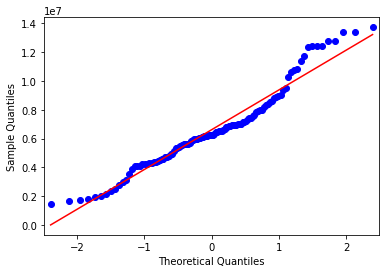

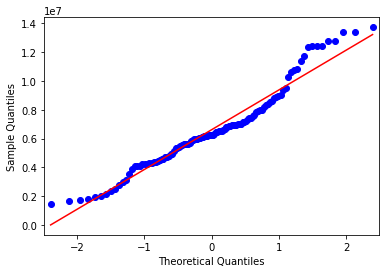

In [171]:
# Q-Q Plot of Injection Volumes
qqplot(eq_inj_df.monthly_volume_m3, line="s")

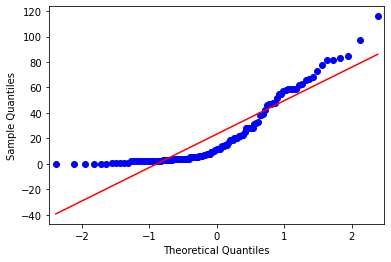

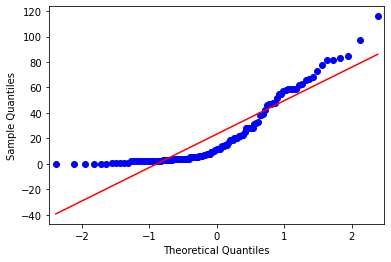

In [172]:
# Q-Q Plot of Earthquake Counts per Month
qqplot(eq_inj_df.count_m3, line="s")

In [235]:
eq_inj_df

,date,year,monthly_volume,well_count,monthly_volume_m3,count_m3,count_m3_offset7,count_m3_offset14,count_m3_offset21,count_m3_offset28,count_m3_offset35,count_m3_offset42,count_m3_offset49,count_m3_offset56,count_m3_offset63,count_m3_offset70
0,2011-01-31,2011,10643949.0,205,1703031.84,1,1,1,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0
1,2011-02-28,2011,9144807.0,205,1463169.12,0,0,1,1.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0
2,2011-03-31,2011,11135572.0,205,1781691.52,2,2,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2011-04-30,2011,11033870.0,205,1765419.20,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2011-05-31,2011,12309264.0,205,1969482.24,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2020-08-31,2020,27195336.0,766,4351253.76,5,4,3,3.0,3.0,2.0,1.0,1.0,4.0,4.0,4.0
113,2020-09-30,2020,26638180.0,766,4262108.80,2,1,1,1.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0
114,2020-10-31,2020,26563113.0,766,4250098.08,4,4,4,3.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0
115,2020-11-30,2020,25796090.0,766,4127374.40,0,0,1,1.0,2.0,2.0,1.0,1.0,0.0,0.0,4.0


In [321]:
# Reshape Data for analysis
X = eq_inj_df.monthly_volume_m3.values.reshape((-1,1))
y = eq_inj_df.count_m3.values.reshape((-1,1))

In [322]:
# Create training and testing groups
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1)

In [323]:
# Create LR object and fit data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [324]:
# Use our model to predict a value
predicted = model.predict(X_test)

# Score the prediction with MSE and R2
mse = mean_squared_error(y_test, predicted)
mae = mean_absolute_error(y_test, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicted)

# Adjusted r2; n = sample size, p = number of independent variables
n = len(y_test)
p = 1
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)


print(f"mean squared error (MSE): {mse}")
print(f"root mean squared error (RMSE): {rmse}")
print(f"mean absolute error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Adjusted R-squared (adj-R2): {adj_r2}")

mean squared error (MSE): 217.85696901605803
root mean squared error (RMSE): 14.75997862518974
mean absolute error (MAE): 12.476674209283514
R-squared (R2): 0.6576346401678164
Adjusted R-squared (adj-R2): 0.6454073058880956


In [280]:
print(y.mean())
print(y.min())
print(y.max())

23.358974358974358
0
116


In [314]:
# Reshape Data for analysis -- offset 
X = eq_inj_df.monthly_volume_m3.values.reshape((-1,1))
y = eq_inj_df.count_m3_offset7.values.reshape((-1,1))

# Create training and testing groups
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1)

# Create LR object and fit data
model = LinearRegression()
model.fit(X_train, y_train)

# Use our model to predict a value
predicted = model.predict(X_test)

# Score the prediction with MSE and R2
mse = mean_squared_error(y_test, predicted)
mae = mean_absolute_error(y_test, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicted)

# Adjusted r2; n = sample size, p = number of independent variables
n = len(y)
p = 1
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)


print(f"mean squared error (MSE): {mse}")
print(f"root mean squared error (RMSE): {rmse}")
print(f"mean absolute error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Adjusted R-squared (adj-R2): {adj_r2}")

mean squared error (MSE): 257.37297033801525
root mean squared error (RMSE): 16.042847949725612
mean absolute error (MAE): 12.381215120914087
R-squared (R2): 0.6758894201689793
Adjusted R-squared (adj-R2): 0.6730710673008835


In [239]:
# Reshape Data for analysis -- offset 
X = eq_inj_df.monthly_volume_m3.values.reshape((-1,1))
y = eq_inj_df.count_m3_offset14.values.reshape((-1,1))

# Create training and testing groups
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1)

# Create LR object and fit data
model = LinearRegression()
model.fit(X_train, y_train)

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with MSE and R2
mse = mean_squared_error(y, predicted)
mae = mean_absolute_error(y, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y, predicted)

# Adjusted r2; n = sample size, p = number of independent variables
n = len(y)
p = 1
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)


print(f"mean squared error (MSE): {mse}")
print(f"root mean squared error (RMSE): {rmse}")
print(f"mean absolute error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Adjusted R-squared (adj-R2): {adj_r2}")

mean squared error (MSE): 241.61683823340857
root mean squared error (RMSE): 15.544029021891609
mean absolute error (MAE): 11.707186330619521
R-squared (R2): 0.6616041829007864
Adjusted R-squared (adj-R2): 0.6586616105781845


In [240]:
# Reshape Data for analysis -- offset 
X = eq_inj_df.monthly_volume_m3.values.reshape((-1,1))
y = eq_inj_df.count_m3_offset21.values.reshape((-1,1))

# Create training and testing groups
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1)

# Create LR object and fit data
model = LinearRegression()
model.fit(X_train, y_train)

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with MSE and R2
mse = mean_squared_error(y, predicted)
mae = mean_absolute_error(y, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y, predicted)

# Adjusted r2; n = sample size, p = number of independent variables
n = len(y)
p = 1
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)


print(f"mean squared error (MSE): {mse}")
print(f"root mean squared error (RMSE): {rmse}")
print(f"mean absolute error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Adjusted R-squared (adj-R2): {adj_r2}")

mean squared error (MSE): 234.236014459698
root mean squared error (RMSE): 15.304770970507791
mean absolute error (MAE): 11.399844786937386
R-squared (R2): 0.6695773106828382
Adjusted R-squared (adj-R2): 0.6667040699061673


In [241]:
# Reshape Data for analysis -- offset 
X = eq_inj_df.monthly_volume_m3.values.reshape((-1,1))
y = eq_inj_df.count_m3_offset28.values.reshape((-1,1))

# Create training and testing groups
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1)

# Create LR object and fit data
model = LinearRegression()
model.fit(X_train, y_train)

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with MSE and R2
mse = mean_squared_error(y, predicted)
mae = mean_absolute_error(y, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y, predicted)

# Adjusted r2; n = sample size, p = number of independent variables
n = len(y)
p = 1
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)


print(f"mean squared error (MSE): {mse}")
print(f"root mean squared error (RMSE): {rmse}")
print(f"mean absolute error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Adjusted R-squared (adj-R2): {adj_r2}")

mean squared error (MSE): 251.04144243125234
root mean squared error (RMSE): 15.844287375305093
mean absolute error (MAE): 12.00064682106784
R-squared (R2): 0.6535622779822257
Adjusted R-squared (adj-R2): 0.6505497760516363


In [242]:
# Reshape Data for analysis -- offset 
X = eq_inj_df.monthly_volume_m3.values.reshape((-1,1))
y = eq_inj_df.count_m3_offset35.values.reshape((-1,1))

# Create training and testing groups
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1)

# Create LR object and fit data
model = LinearRegression()
model.fit(X_train, y_train)

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with MSE and R2
mse = mean_squared_error(y, predicted)
mae = mean_absolute_error(y, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y, predicted)

# Adjusted r2; n = sample size, p = number of independent variables
n = len(y)
p = 1
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)


print(f"mean squared error (MSE): {mse}")
print(f"root mean squared error (RMSE): {rmse}")
print(f"mean absolute error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Adjusted R-squared (adj-R2): {adj_r2}")

mean squared error (MSE): 241.64929234242254
root mean squared error (RMSE): 15.545072928179609
mean absolute error (MAE): 12.095597184516064
R-squared (R2): 0.659153001491448
Adjusted R-squared (adj-R2): 0.6561891145478953


In [243]:
# Reshape Data for analysis -- offset 
X = eq_inj_df.monthly_volume_m3.values.reshape((-1,1))
y = eq_inj_df.count_m3_offset42.values.reshape((-1,1))

# Create training and testing groups
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1)

# Create LR object and fit data
model = LinearRegression()
model.fit(X_train, y_train)

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with MSE and R2
mse = mean_squared_error(y, predicted)
mae = mean_absolute_error(y, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y, predicted)

# Adjusted r2; n = sample size, p = number of independent variables
n = len(y)
p = 1
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)


print(f"mean squared error (MSE): {mse}")
print(f"root mean squared error (RMSE): {rmse}")
print(f"mean absolute error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Adjusted R-squared (adj-R2): {adj_r2}")

mean squared error (MSE): 255.97838990396542
root mean squared error (RMSE): 15.999324670246724
mean absolute error (MAE): 12.403207344001036
R-squared (R2): 0.6416547668436547
Adjusted R-squared (adj-R2): 0.6385387213379474


In [237]:
# Reshape Data for analysis -- offset 
X = eq_inj_df.monthly_volume_m3.values.reshape((-1,1))
y = eq_inj_df.count_m3_offset56.values.reshape((-1,1))

# Create training and testing groups
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1)

# Create LR object and fit data
model = LinearRegression()
model.fit(X_train, y_train)

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with MSE and R2
mse = mean_squared_error(y, predicted)
mae = mean_absolute_error(y, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y, predicted)

# Adjusted r2; n = sample size, p = number of independent variables
n = len(y)
p = 1
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)


print(f"mean squared error (MSE): {mse}")
print(f"root mean squared error (RMSE): {rmse}")
print(f"mean absolute error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Adjusted R-squared (adj-R2): {adj_r2}")

mean squared error (MSE): 257.18968411084427
root mean squared error (RMSE): 16.03713453553484
mean absolute error (MAE): 12.301232007269219
R-squared (R2): 0.6406511972823957
Adjusted R-squared (adj-R2): 0.6375264250848514


In [244]:
# Reshape Data for analysis -- offset 
X = eq_inj_df.monthly_volume_m3.values.reshape((-1,1))
y = eq_inj_df.count_m3_offset63.values.reshape((-1,1))

# Create training and testing groups
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1)

# Create LR object and fit data
model = LinearRegression()
model.fit(X_train, y_train)

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with MSE and R2
mse = mean_squared_error(y, predicted)
mae = mean_absolute_error(y, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y, predicted)

# Adjusted r2; n = sample size, p = number of independent variables
n = len(y)
p = 1
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)


print(f"mean squared error (MSE): {mse}")
print(f"root mean squared error (RMSE): {rmse}")
print(f"mean absolute error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Adjusted R-squared (adj-R2): {adj_r2}")

mean squared error (MSE): 252.44903639787947
root mean squared error (RMSE): 15.888644888658046
mean absolute error (MAE): 12.550119852260755
R-squared (R2): 0.6428337552306589
Adjusted R-squared (adj-R2): 0.6397279617978819


In [245]:
# Reshape Data for analysis -- offset 
X = eq_inj_df.monthly_volume_m3.values.reshape((-1,1))
y = eq_inj_df.count_m3_offset70.values.reshape((-1,1))

# Create training and testing groups
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1)

# Create LR object and fit data
model = LinearRegression()
model.fit(X_train, y_train)

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with MSE and R2
mse = mean_squared_error(y, predicted)
mae = mean_absolute_error(y, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y, predicted)

# Adjusted r2; n = sample size, p = number of independent variables
n = len(y)
p = 1
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)


print(f"mean squared error (MSE): {mse}")
print(f"root mean squared error (RMSE): {rmse}")
print(f"mean absolute error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Adjusted R-squared (adj-R2): {adj_r2}")

mean squared error (MSE): 261.17923706760763
root mean squared error (RMSE): 16.16104071734267
mean absolute error (MAE): 12.543218275547446
R-squared (R2): 0.6373261990246744
Adjusted R-squared (adj-R2): 0.6341725137988019


In [247]:
y.mean()

23.623931623931625

In [248]:
y.max()

116.0

In [249]:
y.min()

0.0

In [258]:
eq_inj_df["log10_count_m3"] = np.log10(eq_inj_df['count_m3'] + 1)

In [259]:
# Reshape Data for analysis -- offset 
X = eq_inj_df.monthly_volume_m3.values.reshape((-1,1))
y = eq_inj_df.log_count_m3.values.reshape((-1,1))

# Create training and testing groups
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.25,
                                                    random_state=1)

# Create LR object and fit data
model = LinearRegression()
model.fit(X_train, y_train)

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with MSE and R2
mse = mean_squared_error(y, predicted)
mae = mean_absolute_error(y, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y, predicted)

# Adjusted r2; n = sample size, p = number of independent variables
n = len(y)
p = 1
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)


print(f"mean squared error (MSE): {mse}")
print(f"root mean squared error (RMSE): {rmse}")
print(f"mean absolute error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Adjusted R-squared (adj-R2): {adj_r2}")

mean squared error (MSE): 0.09919041649813212
root mean squared error (RMSE): 0.3149451007685818
mean absolute error (MAE): 0.25180565650785497
R-squared (R2): 0.6810948885445891
Adjusted R-squared (adj-R2): 0.6783218006188899


<AxesSubplot:>

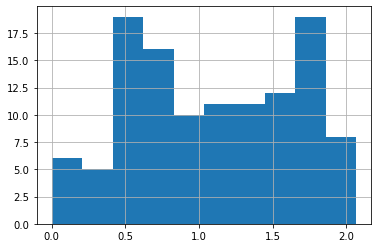

In [260]:
eq_inj_df["log10_count_m3"].hist()

<AxesSubplot:>

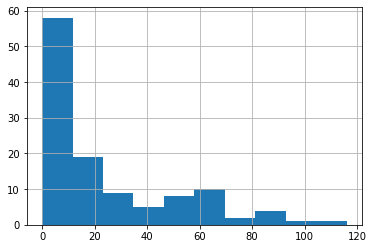

In [261]:
eq_inj_df["count_m3"].hist()

In [283]:
X = eq_inj_df.monthly_volume_m3.values.reshape((-1,1))
y = eq_inj_df.count_m3.values.reshape((-1,1))

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
clf.score(X, y)

1.0

### Split the data into test and training based on date: >2020 is training, 2020 is testing

In [342]:
eq_inj_df_train = eq_inj_df[eq_inj_df.year < 2019]
eq_inj_df_test = eq_inj_df[eq_inj_df.year == 2019]

In [344]:
X_train, y_train = eq_inj_df_train.monthly_volume_m3, eq_inj_df_train.count_m3_offset70
X_test, y_test = eq_inj_df_test.monthly_volume_m3, eq_inj_df_test.count_m3_offset70

In [345]:
X_train = X_train.values.reshape((-1,1))
X_test = X_test.values.reshape((-1,1))
y_train = y_train.values.reshape((-1,1))
y_test = y_test.values.reshape((-1,1))

In [346]:
X_train.shape

(94, 1)

In [347]:
# Create LR object and fit data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [348]:
# Use our model to predict a value
predicted = model.predict(X_test)

# Score the prediction with MSE and R2
mse = mean_squared_error(y_test, predicted)
mae = mean_absolute_error(y_test, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predicted)

# Adjusted r2; n = sample size, p = number of independent variables
n = len(y_test)
p = 1
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)

print(f"mean squared error (MSE): {mse}")
print(f"root mean squared error (RMSE): {rmse}")
print(f"mean absolute error (MAE): {mae}")
print(f"R-squared (R2): {r2}")
print(f"Adjusted R-squared (adj-R2): {adj_r2}")

mean squared error (MSE): 385.93002291037834
root mean squared error (RMSE): 19.6451017536275
mean absolute error (MAE): 19.335981884054203
R-squared (R2): -48.84208367631793
Adjusted R-squared (adj-R2): -53.82629204394972


In [349]:
X_test

array([[6862961.38232879],
       [6001073.9215292 ],
       [6578298.00482685],
       [6441583.41759946],
       [6333406.47999331],
       [6002217.22720109],
       [6280820.63170086],
       [6241368.9518962 ],
       [6048089.37759992],
       [6231876.06713761],
       [5723098.39670029],
       [5982518.88      ]])

In [350]:
y_test

array([[ 1.],
       [ 1.],
       [ 5.],
       [ 3.],
       [11.],
       [ 4.],
       [ 6.],
       [ 3.],
       [ 7.],
       [ 4.],
       [ 3.],
       [ 1.]])

In [351]:
predicted

array([[28.19145374],
       [21.72119838],
       [26.05446391],
       [25.028137  ],
       [24.21604442],
       [21.72978126],
       [23.82127842],
       [23.52511163],
       [22.07414702],
       [23.45384781],
       [19.63441477],
       [21.58190426]])

In [419]:
# Import monthly injection volumes
injection_df_2 = pd.read_csv("../oklahoma_earthquakes_largefiles/for_analysis/round_down_reduced.csv", low_memory=False)

In [420]:
injection_df_2

,date,monthly_volume,well_count
0,2014-01-31,3.845416e+07,527
1,2014-02-28,3.388452e+07,527
2,2014-03-31,4.054072e+07,527
3,2014-04-30,4.099351e+07,527
4,2014-05-31,4.175226e+07,527
...,...,...,...
127,2012-08-31,2.888487e+07,316
128,2012-09-30,2.942758e+07,316
129,2012-10-31,3.092161e+07,316
130,2012-11-30,2.978408e+07,316


In [421]:
# add column for m3
injection_df_2["yearly_volume_m3"] = injection_df_2.monthly_volume * 0.16
injection_df_2.sort_values(by='date')
# convery monthly injection rate dates to datetime dtype, sort by date
injection_df_2.iloc[:, 0] = injection_df_2.iloc[:, 0].apply(pd.to_datetime)
injection_df_2 = injection_df_2.sort_values(by="date")

# grouping monthly injection rates by year
injection_df_2 = injection_df_2.groupby(pd.Grouper(key="date",freq='Y'))["yearly_volume_m3"].sum()
injection_df_2 = pd.DataFrame(injection_df_2)
injection_df_2.rename(columns={"monthly_volume":"total_volume"}, inplace = True)
injection_df_2 = injection_df_2.reset_index()
injection_df_2.head()

,date,yearly_volume_m3
0,2011-12-31,2.663984e+07
1,2012-12-31,5.212862e+07
2,2013-12-31,7.182535e+07
3,2014-12-31,8.947186e+07
4,2015-12-31,1.495704e+08


In [422]:
# yearly injection volumes
df_yearly_reduced = pd.read_csv("../oklahoma_earthquakes_largefiles/occ_06-10_cleaned/inj_06_10_fm.csv", low_memory=False)

In [423]:
df_yearly_reduced

,api,api_year,api_county,api_number,lease_name,well_number,decimal_lat,decimal_long,year,fluid_type,packerdepth,total_volume,formationname
0,3500300026,3500300026-2010,3,26,SE EUREKA UNIT-TUCKER #1,21,36.900324,-98.21826,2010,S,4850,11863,CHEROKEE
1,3500300026,3500300026-2009,3,26,SE EUREKA UNIT-TUCKER #1,21,36.900324,-98.21826,2009,S,4850,11825,CHEROKEE
2,3500300026,3500300026-2008,3,26,SE EUREKA UNIT-TUCKER #1,21,36.900324,-98.21826,2008,S,4850,12236,CHEROKEE
3,3500300026,3500300026-2007,3,26,SE EUREKA UNIT-TUCKER #1,21,36.900324,-98.21826,2007,S,4850,9540,CHEROKEE
4,3500300163,3500300163-2010,3,163,CHRISTENSEN,1,36.896636,-98.17772,2010,S,4933,20120,REDFORK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53892,3509900664,3509900664-2010,99,664,N.E. DAVIS UNIT,10-4,34.547188,-97.07791,2010,S,1963,237573,OIL CREEK
53893,3509900664,3509900664-2009,99,664,N.E. DAVIS UNIT,10-4,34.547188,-97.07791,2009,S,0,0,OIL CREEK
53894,3509900664,3509900664-2008,99,664,N.E. DAVIS UNIT,10-4,34.547188,-97.07791,2008,S,0,769488,OIL CREEK
53895,3509900664,3509900664-2007,99,664,N.E. DAVIS UNIT,10-4,34.547188,-97.07791,2007,S,0,1749917,OIL CREEK


In [424]:
# oringinal dataset very incomplete, dropping NAs
df_yearly_reduced.dropna(inplace=True)
# Filtering for correct years
df_yearly_reduced = df_yearly_reduced[df_yearly_reduced.year < 2011]
df_yearly_reduced = df_yearly_reduced[df_yearly_reduced.formationname == "ARBUCKLE"]
df_yearly_reduced.sort_values(by="year")
df_yearly_reduced["yearly_volume_m3"] = df_yearly_reduced.total_volume * 0.16

# make date column
df_yearly_reduced["date"] = df_yearly_reduced.year.astype(str) + "0101"
# converting date fields to date-time dtype
df_yearly_reduced.iloc[:, 14] = df_yearly_reduced.iloc[:, 14].apply(pd.to_datetime)
# yearly sum of injection volume
yearly_sum = df_yearly_reduced.groupby(pd.Grouper(key="date",freq='Y'))["yearly_volume_m3"].sum()
yearly_sum_df = pd.DataFrame(yearly_sum)
yearly_sum_df = yearly_sum_df.reset_index()
yearly_sum_df.head()

,date,yearly_volume_m3
0,2006-12-31,5816505.60
1,2007-12-31,3026151.04
2,2008-12-31,2824984.00
3,2009-12-31,5320769.92
4,2010-12-31,6214588.80


In [425]:
injection_df_2 = injection_df_2.append(yearly_sum_df,ignore_index = True)
injection_df_2 = injection_df_2.sort_values(by="date")
injection_df_2

,date,yearly_volume_m3
11,2006-12-31,5.816506e+06
12,2007-12-31,3.026151e+06
13,2008-12-31,2.824984e+06
14,2009-12-31,5.320770e+06
15,2010-12-31,6.214589e+06
0,2011-12-31,2.663984e+07
1,2012-12-31,5.212862e+07
2,2013-12-31,7.182535e+07
3,2014-12-31,8.947186e+07
4,2015-12-31,1.495704e+08


In [426]:
fig = px.line(injection_df_2, x="date", y="yearly_volume_m3")
fig.show()

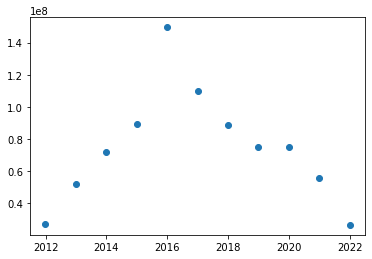

In [382]:
plt.scatter(injection_df_2.date, injection_df_2.yearly_volume_m3)
plt.show()

### Importing eq data within 20km of injection well

In [497]:
# opening earthquake data
eq_df_20km = pd.read_csv('../oklahoma_earthquakes_largefiles/python_exports/eq_20km.csv', low_memory=False)
eq_df_20km.sort_values(by="date")

,id,time,mag,magType,cdi,place,status,latitude,longitude,depth,date,lat/lon,nearby_wells,num_wells,year_month
2131,usp000gtdu,1233656590010,3.10,mblg,2.2,"2 km SSE of Centrahoma, Oklahoma",reviewed,34.589000,-96.340000,5.00,2009-02-03 10:23:10.010,"34.589,-96.34","['3502920422', '3502920422', '3502920422', '35...",5,2009-02
2130,usp000gu9h,1235295786750,3.20,mblg,3.8,"2 km S of Lahoma, Oklahoma",reviewed,36.369000,-98.087000,5.00,2009-02-22 09:43:06.750,"36.369,-98.087","['3504724403', '3509323729', '3509324982', '35...",51,2009-02
2129,usp000gurq,1236517599940,3.40,mblg,4.0,"0 km SSE of Smith Village, Oklahoma",reviewed,35.446000,-97.456000,5.00,2009-03-08 13:06:39.940,"35.446,-97.456","['3510922128', '3510922170', '3510922259', '35...",149,2009-03
2128,usp000gy78,1245015069020,3.40,mblg,3.7,"5 km SSE of Chandler, Oklahoma",reviewed,35.659000,-96.850000,5.00,2009-06-14 21:31:09.020,"35.659,-96.85","['3508123499', '3508123707', '3508123837', '35...",196,2009-06
2127,usp000gyn5,1246051393750,3.70,mblg,4.8,"9 km N of Lucien, Oklahoma",reviewed,36.361000,-97.467000,5.00,2009-06-26 21:23:13.750,"36.361,-97.46700000000001","['3504724818', '3504724848', '3504724338', '35...",219,2009-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,ok2021eltk,1614932795100,3.54,ml,4.9,"5 km N of Ames, Oklahoma",reviewed,36.296333,-98.179000,7.83,2021-03-05 08:26:35.100,"36.29633333,-98.179","['3509323729', '3509324982', '3509323729', '35...",39,2021-03
1437,ok2021fqjl,1616380663000,3.25,ml,4.7,"11 km W of Hennessey, Oklahoma",reviewed,36.113333,-98.029000,5.95,2021-03-22 02:37:43.000,"36.11333333,-98.029","['3504724891', '3507324860', '3507324945', '35...",31,2021-03
1436,ok2021gurr,1617814309609,3.61,ml,4.1,"7 km WSW of Horntown, Oklahoma",reviewed,35.059000,-96.316833,28.64,2021-04-07 16:51:49.609,"35.059,-96.31683333","['3506324315', '3506324366', '3506324421', '35...",97,2021-04
1435,ok2021hipb,1618471591059,3.02,ml,1.0,"5 km SW of Manchester, Oklahoma",reviewed,36.961833,-98.091333,9.02,2021-04-15 07:26:31.059,"36.96183333,-98.09133333","['3505322824', '3505322940', '3500322165', '35...",386,2021-04


In [498]:
# converting date fields to date-time dtype
eq_df_20km.iloc[:, 10] = eq_df_20km.iloc[:, 10].apply(pd.to_datetime)

In [499]:
# grouping eqs by month
eq_df_20km = eq_df_20km.groupby(pd.Grouper(key="date",freq='M', origin="start"))["mag"].count()
# eq_df_20km = eq_df_20km.groupby(["year_month"])["mag"].count()
eq_df_20km = pd.DataFrame(eq_df_20km)
eq_df_20km.rename(columns = {"mag":"count_m3"}, inplace=True)
eq_df_20km

,count_m3
date,
2009-02-28,2
2009-03-31,1
2009-04-30,0
2009-05-31,0
2009-06-30,2
...,...
2021-02-28,6
2021-03-31,2
2021-04-30,2


In [506]:
eq_df_20km[eq_df_20km.index == "2016-03-31"]

,count_m3
date,
2016-03-31,43


In [467]:
eq20km_inj_df = pd.merge(inj_filtered,eq_df_20km,on='date')

In [468]:
eq20km_inj_df[eq20km_inj_df.date == "2016-02-28"]

,date,year,monthly_volume,well_count,monthly_volume_m3,count_m3


In [469]:
fig = px.scatter(eq20km_inj_df, x="monthly_volume_m3", y="count_m3", hover_name="date", trendline="ols")
fig.show()

In [473]:
fig = make_subplots(specs=[[{"secondary_y": True}]])


# Add traces

fig.add_trace(
    go.Scatter(x=eq20km_inj_df.date, y=eq20km_inj_df.monthly_volume_m3,
                    mode='lines',
                    name='Injection Volume'),
    secondary_y=False,)

fig.add_trace(
    go.Scatter(x=eq20km_inj_df.date, y=eq20km_inj_df.count_m3,
                    mode='lines',
                    name='Earthquake Count'),
    secondary_y=True,)

# Add figure title
fig.update_layout(
    title_text="M>3 Earthquakes and Monthly Injection Volumes"
)

# Set x-axis title
fig.update_xaxes(title_text="Date")

# Set y-axes titles
fig.update_yaxes(title_text="Monhtly Injection Volume (m3)", secondary_y=False)
fig.update_yaxes(title_text="Monthly Earthquake Count", secondary_y=True)


fig.show()